# Forecasting with ARIMA

The statsmodels library provides the capability to fit an ARIMA model.

An ARIMA model can be created using the statsmodels library as follows:

1. Define the model by calling ARIMA() and passing in the p, d, and q parameters.
2. The model is prepared on the training data by calling the fit() function.
3. Predictions can be made by calling the predict() function and specifying the index of the time or times to be predicted.

First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

When fitting the model, a lot of debug information is provided about the fit of the linear regression model. We can turn this off by setting the disp argument to 0.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
%cd /content/drive/My Drive/Notebooks/Sales Forecasting

/content/drive/My Drive/Notebooks/Sales Forecasting


In [0]:
import pandas as pd
import numpy as np
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [0]:
sales = pd.read_csv('data/sales-of-shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

In [0]:
dates = pd.date_range('1901-01', periods=36, freq='M')
sales.index = dates

1901-01-31    266.0
1901-02-28    145.9
1901-03-31    183.1
1901-04-30    119.3
1901-05-31    180.3
Freq: M, Name: Sales of shampoo over a three year period, dtype: float64


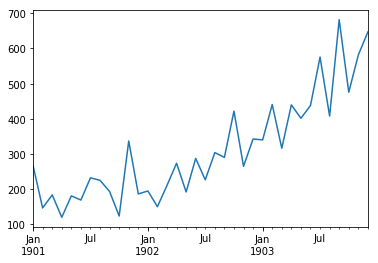

In [6]:
print(sales.head())
sales.plot()
pyplot.show()

As we can see, the data has got an ascending trend and it's composed of 36 observations.

## Autocorrelation plot

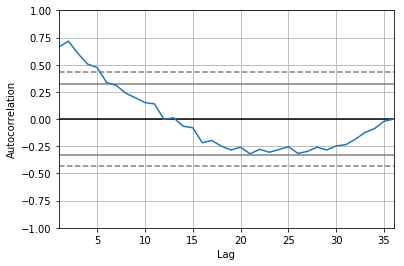

In [9]:
autocorrelation_plot(sales)
pyplot.show()

There is a positive correlation with the first 10-to-12 lags that is perhaps significant for the first 5 lags.

A good starting point for the AR parameter of the model may be 5.

                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Thu, 26 Sep 2019   AIC                            406.340
Time:                                                 12:31:24   BIC                            417.227
Sample:                                             02-28-1901   HQIC                           410.098
                                                  - 12-31-1903                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

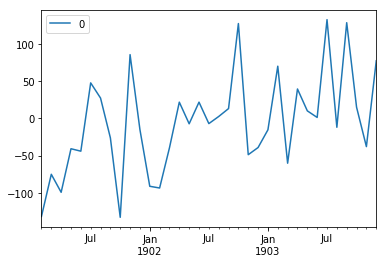

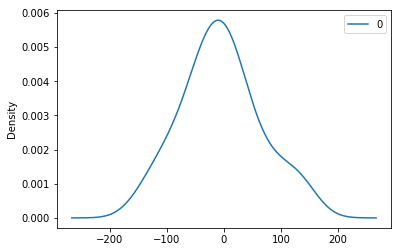

                0
count   35.000000
mean    -5.495267
std     68.132879
min   -133.296649
25%    -42.477975
50%     -7.186677
75%     24.748283
max    133.237923


In [7]:
# fit model
model = ARIMA(sales, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

## Rolling Forecast ARIMA Model

predicted=349.117705, expected=342.300000
predicted=306.512977, expected=339.700000
predicted=387.376388, expected=440.400000
predicted=348.154194, expected=315.900000
predicted=386.308770, expected=439.300000
predicted=356.081960, expected=401.300000
predicted=446.379501, expected=437.400000
predicted=394.737276, expected=575.500000
predicted=434.915504, expected=407.600000
predicted=507.923350, expected=682.000000
predicted=435.482832, expected=475.300000
predicted=652.743765, expected=581.300000
predicted=546.343452, expected=646.900000
Test MSE: 6958.330


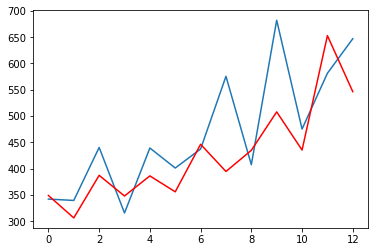

In [8]:
X = sales.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## Configuring an ARIMA Model

The classical approach for fitting an ARIMA model is to follow the Box-Jenkins Methodology.

This is a process that uses time series analysis and diagnostics to discover good parameters for the ARIMA model.

In summary, the steps of this process are as follows:

1. **Model Identification:** Use plots and summary statistics to identify trends, seasonality, and autoregression elements to get an idea of the amount of differencing and the size of the lag that will be required.
2. **Parameter Estimation:** Use a fitting procedure to find the coefficients of the regression model.
3. **Model Checking:** Use plots and statistical tests of the residual errors to determine the amount and type of temporal structure not captured by the model.
The process is repeated until either a desirable level of fit is achieved on the in-sample or out-of-sample observations (e.g. training or test datasets).